<a href="https://colab.research.google.com/github/PKRaj007/PKRaj007/blob/main/VGG_16_implimented%20by%20Transfer%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas and Numpy for data structures and util fucntions
import scipy as sp
import numpy as np
import pandas as pd
from numpy.random import rand
pd.options.display.max_colwidth = 600
import time
# Scikit Imports
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

#import cnn_utils as utils
#from model_evaluation_utils import get_metrics

# Matplot Imports
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
%matplotlib inline

# pandas display data frames as tables
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf


In [ ]:

from keras import callbacks
from keras import optimizers
from keras.datasets import cifar10
#from keras.engine import Model
from keras.applications import vgg16 as vgg
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils


In [ ]:
BATCH_SIZE = 32
EPOCHS = 40
NUM_CLASSES = 10
LEARNING_RATE = 1e-4
MOMENTUM = 0.9

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
X_newtest=X_test[:50]

In [ ]:
X_newtest.shape

(50, 48, 48, 3)

In [ ]:
Y_newtest=y_test[:50]

In [ ]:
Y_newtest.shape

(50, 1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.15, 
                                                  stratify=np.array(y_train), 
                                                  random_state=42)

In [ ]:
Y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
Y_val = np_utils.to_categorical(y_val, NUM_CLASSES)
Y_test = np_utils.to_categorical(y_test, NUM_CLASSES)

In [ ]:
pip install scipy==1.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train = np.array([sp.misc.imresize(x, 
                                     (48, 48)) for x in X_train])
X_val = np.array([sp.misc.imresize(x, 
                                   (48, 48)) for x in X_val])
X_test = np.array([sp.misc.imresize(x, 
                                    (48, 48)) for x in X_test])

In [ ]:
base_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(48, 48, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
last = base_model.get_layer('block3_pool').output

In [ ]:
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
NUM_CLASSES=10
pred = Dense(NUM_CLASSES, activation='softmax')(x)
model = tf.keras.Model(base_model.input, pred)



In [ ]:
for layer in base_model.layers:
     layer.trainable = False

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

**Data Augmentation**
                    To help model generalize and overcome the limitations of a small dataset, we prepare augmented datasets using keras utilities

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    horizontal_flip=False)

In [ ]:
train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train,
                                     Y_train, 
                                     batch_size=BATCH_SIZE)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1. / 255,
    horizontal_flip=False)

val_datagen.fit(X_val)
val_generator = val_datagen.flow(X_val,
                                 Y_val,
                                 batch_size=BATCH_SIZE)

In [ ]:
train_steps_per_epoch = X_train.shape[0] // BATCH_SIZE
val_steps_per_epoch = X_val.shape[0] // BATCH_SIZE

history = model.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=val_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=EPOCHS,
                              verbose=1)

Epoch 1/40
1328/1328 [==============================] - 14s 11ms/step - loss: 0.0928 - accuracy: 0.8169 - val_loss: 0.1126 - val_accuracy: 0.7694
Epoch 2/40
1328/1328 [==============================] - 14s 11ms/step - loss: 0.0934 - accuracy: 0.8191 - val_loss: 0.1128 - val_accuracy: 0.7687
Epoch 3/40
1328/1328 [==============================] - 14s 11ms/step - loss: 0.0926 - accuracy: 0.8194 - val_loss: 0.1120 - val_accuracy: 0.7711
Epoch 4/40
1328/1328 [==============================] - 14s 11ms/step - loss: 0.0917 - accuracy: 0.8213 - val_loss: 0.1124 - val_accuracy: 0.7714
Epoch 5/40
1328/1328 [==============================] - 14s 11ms/step - loss: 0.0911 - accuracy: 0.8214 - val_loss: 0.1126 - val_accuracy: 0.7706
Epoch 6/40
1328/1328 [==============================] - 14s 11ms/step - loss: 0.0902 - accuracy: 0.8230 - val_loss: 0.1128 - val_accuracy: 0.7702
Epoch 7/40
1328/1328 [==============================] - 14s 11ms/step - loss: 0.0899 - accuracy: 0.8243 - val_loss: 0.1134 -

Analyze Model **Performance**

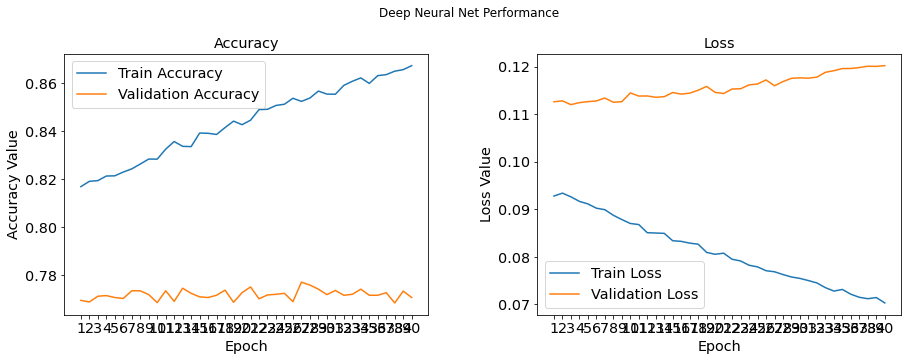

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,EPOCHS+1))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
predictions = model.predict(X_test/255.)

In [ ]:
predictions[:5]

[3, 8, 8, 0, 6]

In [ ]:
class_names[3]

'cat'

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
y_pred=('true_labels',y_test, 
                'predicted_labels',predictions)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.85      0.85      0.85      1000
           2       0.72      0.70      0.71      1000
           3       0.61      0.60      0.60      1000
           4       0.75      0.69      0.72      1000
           5       0.69      0.67      0.68      1000
           6       0.77      0.84      0.80      1000
           7       0.80      0.81      0.81      1000
           8       0.83      0.88      0.86      1000
           9       0.84      0.82      0.83      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [ ]:
def perturb_image(xs, img):
  #xs perturbations [x,y,r,g,b]
    # If this function is passed just one perturbation vector (one pixel perturbation),
    # pack it in a list to keep the computation the same
    if xs.ndim < 2:
        xs = np.array([xs])
        print(xs)
    # Repet this on image n == len(xs) times so that we can 
    # create n new perturbed images
    tile = [len(xs)] + [1]*(xs.ndim+1)
    
    imgs = np.tile(img, tile)
    
    # Make sure to floor the members of xs as int types
    xs = xs.astype(int)
    
    for x,img in zip(xs, imgs):
        # Split x ( single pixel) into an array of 5-tuples (perturbation pixels)
        # i.e., [[x,y,r,g,b], ...]
        pixels = np.split(x, len(x) // 5)
        #split seprate array into its single elements (seperator,maxsplit);
        for pixel in pixels:
            # At each pixel's x,y position, assign its rgb value
            x_pos, y_pos, *rgb = pixel
            img[x_pos, y_pos] = rgb
    
    return imgs

In [ ]:
from numpy.random import rand
from numpy.random import choice
from numpy import asarray
from numpy import clip
from numpy import argmin
from numpy import min
from numpy import around
from matplotlib import pyplot
import pytest
import math
import time

# define objective function
def obj(x):
    return x[0]**2.0 + x[1]**2.0


# define mutation operation
def mutation(x, F):
    return x[0] + F * (x[1] - x[2])


# define boundary check operation
def check_bounds(mutated, bounds):
    mutated_bound = [clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))]
    return mutated_bound


# define crossover operation
def crossover(mutated, target, dims, cr):
    # generate a uniform random value for every dimension
    p = rand(dims)
    # generate trial vector by binomial crossover
    trial = [mutated[i] if p[i] < cr else target[i] for i in range(dims)]
    return trial


def differential_evolution(predict_fn, bounds, maxiter, popsize,
        recombination=1, atol=-1):
    # initialise population of candidate solutions randomly within the specified bounds
    pop = bounds[:, 0] + (rand(popsize, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    print('Pop = ',pop)
    # evaluate initial population of candidate solutions
    obj_all = [obj(ind) for ind in pop]
    print(obj_all)
    # find the best performing vector of initial population
    best_vector = pop[argmin(obj_all)]
    best_obj = min(obj_all)
    prev_obj = best_obj
    # initialise list to store the objective function value at each iteration
    obj_iter = list()
    # run iterations of the algorithm
    for i in range(iter):
        # iterate over all candidate solutions
        for j in range(popsize):
            # choose three candidates, a, b and c, that are not the current one
            candidates = [candidate for candidate in range(popsize) if candidate != j]
            a, b, c = pop[choice(candidates, 3, replace=False)]
            # perform mutation
            mutated = mutation([a, b, c], F)
            # check that lower and upper bounds are retained after mutation
            trial = check_bounds(mutated, bounds)
            # perform crossover
            # trial = crossover(trial, pop[j], len(bounds), cr)
            # compute objective function value for target vector
            obj_target = obj(pop[j])
            # compute objective function value for trial vector
            obj_trial = obj(trial)
            # perform selection
            # print('Prior : ',pop[j])
            if obj_trial < obj_target:
                # replace the target vector with the trial vector
                pop[j] = trial
                # store the new objective function value
                obj_all[j] = obj_trial
            # print('After : ',pop[j])
        # find the best performing vector at each iteration
        best_obj = min(obj_all)
        # store the lowest objective function value
        if best_obj < prev_obj:
            best_vector = pop[argmin(obj_all)]
            prev_obj = best_obj
            obj_iter.append(best_obj)
            # report progress at each iteration
            print('Iteration: %d f([%s]) = %.5f' % (i, around(best_vector, decimals=5), best_obj))
        
        # if(math.isclose(0.00000,best_obj, abs_tol = 10**-5)):
        #   break
        
        #if best_obj == pytest.approx(0.00000):
        # print('iter = ',i)
        # break
    return [best_vector, best_obj, obj_iter]

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
LOADER_KWARGS = {'num_workers': 1, 'pin_memory': True} if torch.cuda.is_available() else {'num_workers': 4}
print("CUDA Available:", torch.cuda.is_available())

NameError: ignored

In [ ]:
CIFAR_LABELS = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def show(img):
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

def tell(img, label, model, target_label=None):
    print("True Label:", CIFAR_LABELS[label], label)
    print("Prediction:", CIFAR_LABELS[model(img.unsqueeze(0)).max(-1)[1]], model(img.unsqueeze(0)).max(-1)[1][0].item())
    print("Label Probabilities:", F.softmax(model(img.unsqueeze(0)).squeeze(), dim=0))
    print("True Label Probability:", F.softmax(model(img.unsqueeze(0)).squeeze(), dim=0)[label].item())
    if target_label is not None:
        print("Target Label Probability:", F.softmax(model(img.unsqueeze(0)).squeeze(), dim=0)[target_label].item())

In [ ]:
for i in range(10):
  test_img, test_label =X_test[i]
  test_img = test_img.to(DEVICE)
  show(test_img)
  start = time.time()
  tell(test_img, test_label,model)
  print(f'Time: {time.time() - start}')

ValueError: ignored

In [ ]:
def perturb(p, img):
    # Elements of p should be in range [0,1]
    img_size = img.size(1) # C x _H_ x W, assume H == W
    p_img = img.clone()
    xy = (p[0:2].copy() * img_size).astype(int)
    xy = np.clip(xy, 0, img_size-1)
    rgb = p[2:5].copy()
    rgb = np.clip(rgb, 0, 1)
    p_img[:,xy[0],xy[1]] = torch.from_numpy(rgb) # Changing color of xy pixel
    return p_img

def visualize_perturbation(p, img, label, model, target_label=None):
    p_img = perturb(p, img)
    print("Perturbation:", p)
    show(p_img)
    tell(p_img, label, model, target_label)

visualize_perturbation(np.array([0.6,0.6,0,0,0.75]), test_img, test_label, cifar_model)

NameError: ignored

In [ ]:
# Pertube nd tells the probability
def evaluate(candidates, img, label, model):
    preds = []
    model.eval()
    with torch.no_grad():
        for i, xs in enumerate(candidates):
            p_img = perturb(xs, img)
            preds.append(F.softmax(model(p_img.unsqueeze(0)).squeeze(), dim=0)[label].item())
    return np.array(preds)

# Generates Child and Return(Mutate)
def evolve(candidates, F=0.5, strategy="clip"):
    gen2 = candidates.copy()
    num_candidates = len(candidates)
    for i in range(num_candidates):
        x1, x2, x3 = candidates[np.random.choice(num_candidates, 3, replace=False)]
        x_next = (x1 + F*(x2 - x3))
        if strategy == "clip":
            gen2[i] = np.clip(x_next, 0, 1)
        elif strategy == "resample":
            x_oob = np.logical_or((x_next < 0), (1 < x_next))
            x_next[x_oob] = np.random.random(5)[x_oob]
            gen2[i] = x_next
    return gen2

def attack(model, img, true_label, target_label=None, iters=100, pop_size=400, verbose=True):
    # Targeted: maximize target_label if given (early stop > 50%)
    # Untargeted: minimize true_label otherwise (early stop < 5%)
    candidates = np.random.random((pop_size,5)) # take rray of 400(pixel),5(xyrgb) and fill with [0,1)
    candidates[:,2:5] = np.clip(np.random.normal(0.5, 0.5, (pop_size, 3)), 0, 1)
    is_targeted = target_label is not None
    label = target_label if is_targeted else true_label
    fitness = evaluate(candidates, img, label, model)
    
    def is_success():
        return (is_targeted and fitness.max() > 0.5) or ((not is_targeted) and fitness.min() < 0.05)
    
    for iteration in range(iters):
        # Early Stopping
        if is_success():
            break
        if verbose and iteration%10 == 0: # Print progress
            print("Target Probability [Iteration {}]:".format(iteration), fitness.max() if is_targeted else fitness.min())
        # Generate new candidate solutions
        new_gen_candidates = evolve(candidates, strategy="resample")
        # Evaluate new solutions
        new_gen_fitness = evaluate(new_gen_candidates, img, label, model)
        # Replace old solutions with new ones where they are better
        successors = new_gen_fitness > fitness if is_targeted else new_gen_fitness < fitness
        candidates[successors] = new_gen_candidates[successors] # Updte candidatea
        fitness[successors] = new_gen_fitness[successors]
    best_idx = fitness.argmax() if is_targeted else fitness.argmin()
    best_solution = candidates[best_idx]
    best_score = fitness[best_idx]
    if verbose:
        visualize_perturbation(best_solution, img, true_label, model, target_label)
    return is_success(), best_solution, best_score

# Untargeted attack
_ = attack(model, test_img, test_label)

NameError: ignored

In [ ]:
# Targeted attack
# This is much harder/costlier than an untargeted attack
# For time reasons, targeted attacks below use 20 iterations
targeted_results = {}
for idx in range(len(CIFAR_LABELS)):
    if idx != test_label:
        targeted_results[idx] = attack(model, test_img, test_label, target_label=idx, iters=20, verbose=False)
        print(CIFAR_LABELS[idx], idx, targeted_results[idx][0], targeted_results[idx][2])
    else:
        print(CIFAR_LABELS[idx], idx, "True Label")

NameError: ignored